In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd

# Define the directory containing the train and test CSV files
filepath = "/content/drive/MyDrive/ColabNotebooks/CODSOFT/CREDIT CARD FRAUD DETECTION/Datasets/"

# File names for train and test datasets
train_file = "fraudTrain.csv"
test_file = "fraudTest.csv"

# Construct full paths to train and test CSV files
train_path = filepath + train_file
test_path = filepath + test_file

# Load the training and testing datasets into Pandas DataFrames
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)


In [38]:
train_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [39]:
test_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [40]:
print("Train Columns")
print(train_data.columns)
print("Shape: ",train_data.shape)
print("Test Columns")
print(test_data.columns)
print("Shape: ",test_data.shape)

train_columns = set(train_data.columns)
test_columns = set(test_data.columns)

# Find the columns that are present in train dataset but not in test dataset
train_not_in_test = train_columns - test_columns

# Find the columns that are present in test dataset but not in train dataset
test_not_in_train = test_columns - train_columns

# Display the difference in columns
print("Columns present in train dataset but not in test dataset:")
print(train_not_in_test)

print("\nColumns present in test dataset but not in train dataset:")
print(test_not_in_train)


Train Columns
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
Shape:  (1296675, 23)
Test Columns
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
Shape:  (555719, 23)
Columns present in train dataset but not in test dataset:
set()

Columns present in test dataset but not in train dataset:
set()


In [41]:
import pandas as pd

def calculate_missing_values(data):
    total_rows = len(data)
    missing_count = data.isnull().sum()
    missing_percentage = (missing_count / total_rows) * 100

    missing_values_df = pd.DataFrame({
        'Column Name': missing_count.index,
        'Missing Values': missing_count.values,
        'Percentage Missing': missing_percentage.values
    })

    return missing_values_df

In [42]:
# Calculate missing values in the train dataset
train_missing_values = calculate_missing_values(train_data)
print("Missing Values Summary for Train Dataset:")
train_missing_values

Missing Values Summary for Train Dataset:


,Column Name,Missing Values,Percentage Missing
0,Unnamed: 0,0,0.0
1,trans_date_trans_time,0,0.0
2,cc_num,0,0.0
3,merchant,0,0.0
4,category,0,0.0
5,amt,0,0.0
6,first,0,0.0
7,last,0,0.0
8,gender,0,0.0
9,street,0,0.0


In [43]:
test_missing_values = calculate_missing_values(test_data)
print("Missing Values Summary for Test Dataset:")
test_missing_values

Missing Values Summary for Test Dataset:


,Column Name,Missing Values,Percentage Missing
0,Unnamed: 0,0,0.0
1,trans_date_trans_time,0,0.0
2,cc_num,0,0.0
3,merchant,0,0.0
4,category,0,0.0
5,amt,0,0.0
6,first,0,0.0
7,last,0,0.0
8,gender,0,0.0
9,street,0,0.0


In [44]:
import pandas as pd

def concatenate_data(train_data, test_data):
    concatenated_data = pd.concat([train_data, test_data], ignore_index=True)
    return concatenated_data
data = concatenate_data(train_data, test_data)
data.shape

(1852394, 23)

In [45]:
import pandas as pd

def column_info(data):
    columns = data.columns
    dtypes = data.dtypes
    value_counts = [data[col].value_counts().to_dict() for col in columns]

    info_df = pd.DataFrame({
        'Column Name': columns,
        'Data Type': dtypes,
        'Value Count': value_counts
    })

    return info_df

info_df = column_info(data)
info_df

,Column Name,Data Type,Value Count
Unnamed: 0,Unnamed: 0,int64,"{0: 2, 370474: 2, 370488: 2, 370487: 2, 370486..."
trans_date_trans_time,trans_date_trans_time,object,"{'2019-04-22 16:02:01': 4, '2020-06-02 12:47:0..."
cc_num,cc_num,int64,"{6538441737335434: 4392, 30270432095985: 4392,..."
merchant,merchant,object,"{'fraud_Kilback LLC': 6262, 'fraud_Cormier LLC..."
category,category,object,"{'gas_transport': 188029, 'grocery_pos': 17619..."
amt,amt,float64,"{1.14: 779, 1.1: 745, 1.04: 744, 1.08: 741, 1...."
first,first,object,"{'Christopher': 38112, 'Robert': 30743, 'Jessi..."
last,last,object,"{'Smith': 40940, 'Williams': 33661, 'Davis': 3..."
gender,gender,object,"{'F': 1014749, 'M': 837645}"
street,street,object,"{'444 Robert Mews': 4392, '908 Brooks Brook': ..."


In [46]:
import pandas as pd

def show_duplicates(df):
    # Find duplicate rows
    duplicates = df[df.duplicated(keep=False)]
    return duplicates
# Show duplicate rows
duplicate_rows = show_duplicates(data)
print("Duplicate Rows:")
duplicate_rows

Duplicate Rows:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [47]:
import pandas as pd

def categorize_jobs(job):
    job_lower = job.lower()  # Convert job title to lowercase for case-insensitive matching

    # Define categories based on keywords
    engineering_keywords = ['engineer', 'scien', 'architect', 'pilot', 'airline', 'researcher',
                            'systems', 'transport', 'geomatics', 'technic', 'database', 'programmer']
    health_keywords = ['health', 'doctor', 'hospital', 'animal', 'surgeon', 'psychologist',
                       'medical', 'clinical', 'nurse', 'ist']
    finance_education_keywords = ['finance', 'accountant', 'manager', 'financial', 'education',
                                  'teacher', 'lecturer', 'academic']
    design_media_keywords = ['editior', 'photo', 'video', 'design', 'television', 'camera',
                             'multimedia', 'media']

    # Check for keywords and assign category
    if any(keyword in job_lower for keyword in engineering_keywords):
        return "Engineering"
    elif any(keyword in job_lower for keyword in health_keywords):
        return "Health"
    elif any(keyword in job_lower for keyword in finance_education_keywords):
        return "Finances and Education"
    elif any(keyword in job_lower for keyword in design_media_keywords):
        return "Design and Media"
    else:
        return "Others"


data['job'] = data['job'].apply(categorize_jobs)

data["job"].value_counts()

Others                    633746
Health                    464117
Engineering               422197
Finances and Education    210847
Design and Media          121487
Name: job, dtype: int64

In [48]:
import pandas as pd

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour
data['day_of_the_week'] = data['trans_date_trans_time'].dt.day_name()
# data['year_month'] = data['trans_date_trans_time'].dt.to_period('M')

In [49]:
import numpy as np

data['dob'] = pd.to_datetime(data['dob'])
data['age'] = np.round((data['trans_date_trans_time'] - data['dob'])/np.timedelta64(1,'Y'))

In [50]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,day_of_the_week,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,Health,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,31.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Finances and Education,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,41.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Others,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,57.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Others,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,52.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Health,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,33.0


In [51]:
import matplotlib.pyplot as plt

def plot_categorical_column(df, column,clr="skyblue"):
    category_counts = df[column].value_counts()

    # Plot bar plot
    plt.figure(figsize=(6, 3))
    category_counts.plot(kind='bar', color=clr)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()



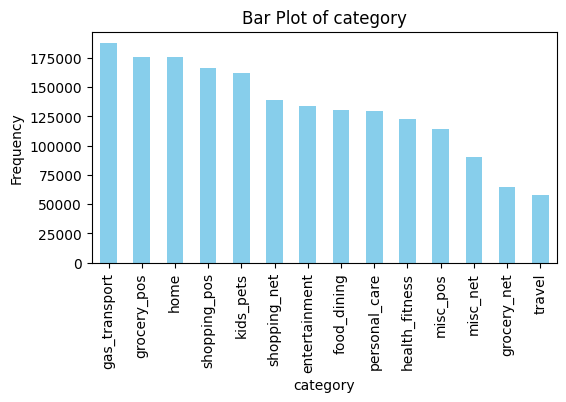

In [52]:
plot_categorical_column(data,"category")

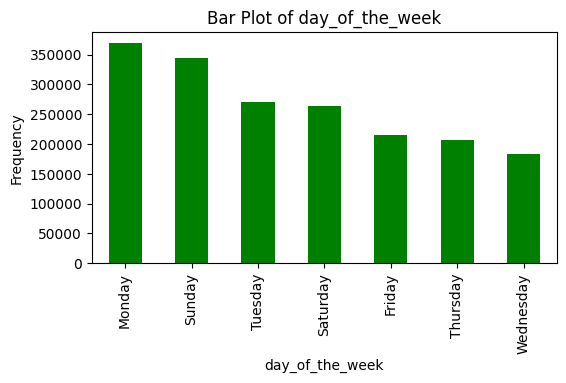

In [53]:
plot_categorical_column(data,"day_of_the_week",clr="green")

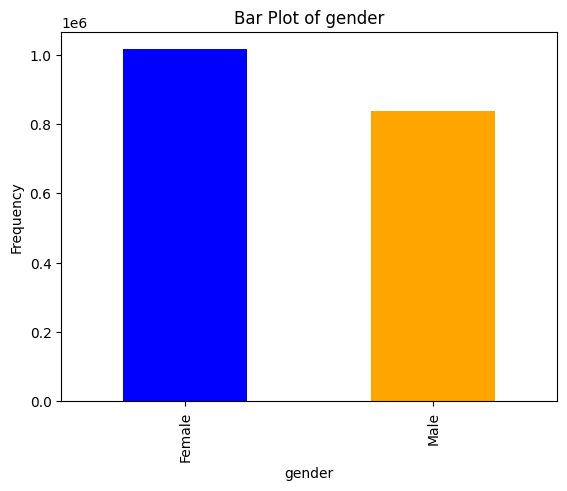

In [54]:
import matplotlib.pyplot as plt

def plot_binary_column(df, column):
    # Count the frequency of each category in the column
    category_counts = df[column].value_counts()

    # Plot bar plot with different colors for each category
    category_counts.plot(kind='bar', color=['blue', 'orange'])

    # Add labels and title
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks([0, 1], ['Female', 'Male'])  # Assuming 0 represents Female and 1 represents Male

    plt.show()
plot_binary_column(data,"gender")

In [55]:
import pandas as pd

def one_hot_encode(df, columns):
    # Perform one-hot encoding on specified columns
    encoded_columns = pd.get_dummies(df[columns], prefix=columns, drop_first=True)

    # Concatenate the original DataFrame with the encoded columns
    df_encoded = pd.concat([df.drop(columns, axis=1), encoded_columns], axis=1)

    return df_encoded
data=one_hot_encode(data,["category","gender","day_of_the_week"])

In [56]:
import pandas as pd
pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_of_the_week_Monday,day_of_the_week_Saturday,day_of_the_week_Sunday,day_of_the_week_Thursday,day_of_the_week_Tuesday,day_of_the_week_Wednesday
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,Health,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Finances and Education,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Others,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Others,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,Tyler,Garcia,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Health,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [57]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of the Earth in kilometers
    R = 6371.0

    # Calculate the distance
    distance = R * c
    return distance
data['distance'] = haversine_distance(data['lat'], data['long'],data['merch_lat'], data['merch_long'])
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_of_the_week_Monday,day_of_the_week_Saturday,day_of_the_week_Sunday,day_of_the_week_Thursday,day_of_the_week_Tuesday,day_of_the_week_Wednesday,distance
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,Health,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Finances and Education,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Others,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Others,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,Tyler,Garcia,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Health,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744


In [58]:
import pandas as pd

def extract_date_only(df, column_name='trans_date_trans_time'):
    # Convert the datetime column to datetime format
    df[column_name] = pd.to_datetime(df[column_name])
    # Extract the date portion
    df['trans_date'] = df[column_name].dt.date
    return df
data=extract_date_only(data)

In [59]:
import pandas as pd

def create_historical_transactions_column(df, id_column='cc_num', date_column='trans_date', transaction_column='transaction_count'):
    df['historical_transactions'] = df.groupby([id_column, date_column])[id_column].transform('count')

    return df
data=create_historical_transactions_column(data)


In [60]:
def create_total_fraudulent_transactions_column(df, id_column='cc_num', date_column='trans_date', fraud_column='is_fraud', total_fraud_column='total_fraudulent_transactions'):
    """
    Create a new column indicating the total number of fraudulent transactions made by each individual on a given day.

    Parameters:
    df (DataFrame): The DataFrame containing transaction data.
    id_column (str): The name of the column representing the individual's identity (default is 'id_number').
    date_column (str): The name of the column representing the transaction date (default is 'trans_date').
    fraud_column (str): The name of the column indicating fraudulence (default is 'is_fraud').
    total_fraud_column (str): The name of the new column to be created (default is 'total_fraudulent_transactions').

    Returns:
    DataFrame: A DataFrame with the new column indicating the total number of fraudulent transactions made by each individual on a given day.
    """
    # Group by 'id_number' and 'trans_date', then count the fraudulent transactions for each group
    df[total_fraud_column] = df.groupby([id_column, date_column])[fraud_column].transform('sum')

    return df
data=create_total_fraudulent_transactions_column(data)


In [61]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_of_the_week_Monday,day_of_the_week_Saturday,day_of_the_week_Sunday,day_of_the_week_Thursday,day_of_the_week_Tuesday,day_of_the_week_Wednesday,distance,trans_date,historical_transactions,total_fraudulent_transactions
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,Health,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568,2019-01-01,3,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Finances and Education,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176,2019-01-01,10,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Others,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083,2019-01-01,1,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Others,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231,2019-01-01,2,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,Tyler,Garcia,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Health,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744,2019-01-01,4,0


In [62]:
data.isnull().sum()

Unnamed: 0                       0
trans_date_trans_time            0
cc_num                           0
merchant                         0
amt                              0
first                            0
last                             0
street                           0
city                             0
state                            0
zip                              0
lat                              0
long                             0
city_pop                         0
job                              0
dob                              0
trans_num                        0
unix_time                        0
merch_lat                        0
merch_long                       0
is_fraud                         0
transaction_hour                 0
age                              0
category_food_dining             0
category_gas_transport           0
category_grocery_net             0
category_grocery_pos             0
category_health_fitness          0
category_home       

In [109]:
import pandas as pd

def drop_columns(data, columns_to_drop):
    data_without_columns = data.drop(columns=columns_to_drop, errors='ignore')
    return data_without_columns

columns_to_drop = ["Unnamed: 0","total_fraudulent_transactions","merchant",'trans_date_trans_time',"cc_num","trans_num","first","last","unix_time","street","zip","city","city_pop","state","dob","job","merch_lat","merch_long","lat","long","trans_date"]

# Drop columns
data = drop_columns(data, columns_to_drop)
print("Data without specified columns:")
data.head(5)

Data without specified columns:


,is_fraud,transaction_hour,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_of_the_week_Monday,day_of_the_week_Saturday,day_of_the_week_Sunday,day_of_the_week_Thursday,day_of_the_week_Tuesday,day_of_the_week_Wednesday,distance,historical_transactions
0,0,0,31.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,78.597568,3
1,0,0,41.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.212176,10
2,0,0,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,108.206083,1
3,0,0,52.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,95.673231,2
4,0,0,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,77.556744,4


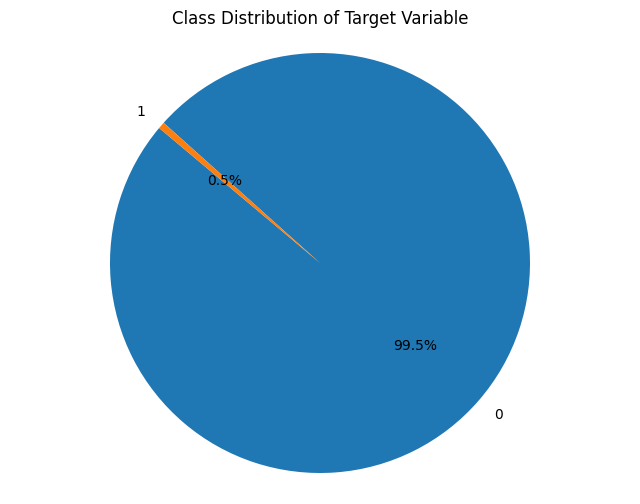

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

def check_imbalance(data, target_column):
    # Calculate class distribution
    class_distribution = data[target_column].value_counts()

    # Plot pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
    plt.title('Class Distribution of Target Variable')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


# Specify the target variable column
target_column = "is_fraud"

# Check for imbalance and plot pie chart
check_imbalance(data, target_column)

In [111]:
train_data = data.iloc[:1296675, :]
test_data = data.iloc[1296675:, :]
train_data.shape,test_data.shape

((1296675, 25), (555719, 25))

In [112]:
X = train_data.drop(columns=["is_fraud"])
y = train_data["is_fraud"]

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
def evaluate_model(model, X_Train, y_Train):
    # Train the model
    model.fit(X_Train, y_Train)
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Create a DataFrame of evaluation metrics
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
        'Score': [accuracy, precision, recall, f1]
    })

    return metrics_df


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

def plot_confusion_matrix(model, X_Test, y_Test):
    """
    Plot the confusion matrix of the model.

    Parameters:
    model: The trained machine learning model.
    X_test: The feature matrix of the testing set.
    y_test: The true labels of the testing set.
    """
    # Make predictions
    y_pred = model.predict(X_Test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_Test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()




In [115]:
def plot_roc_curve(model, X_Test, y_Test):
    """
    Plot the ROC curve of the model.

    Parameters:
    model: The trained machine learning model.
    X_test: The feature matrix of the testing set.
    y_test: The true labels of the testing set.
    """
    # Calculate predicted probabilities
    y_prob = model.predict_proba(X_Test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_Test, y_prob)

    # Calculate AUC score
    auc_score = roc_auc_score(y_Test, y_prob)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

In [116]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model
logistic_model = LogisticRegression(max_iter=10000)
# Evaluate the model
metrics_df = evaluate_model(logistic_model, X_train, y_train)
print("Evaluation Metrics for Logistic Regression:")
metrics_df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation Metrics for Logistic Regression:


,Metric,Score
0,Accuracy,0.994126
1,Precision,0.000000
2,Recall,0.000000
3,F1-score,0.000000


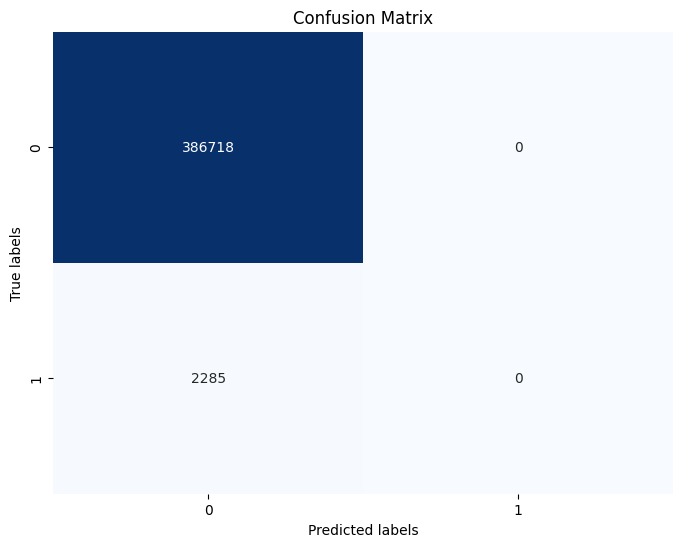

In [117]:
# Plot confusion matrix
plot_confusion_matrix(logistic_model, X_test, y_test)


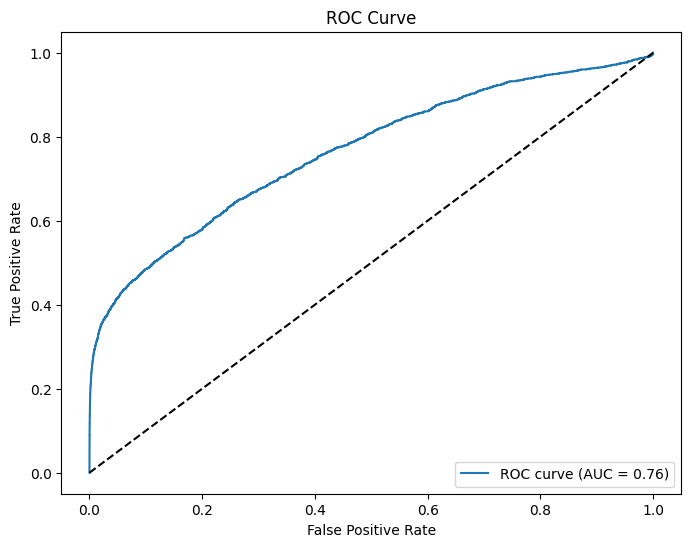

In [118]:
# Plot ROC curve
plot_roc_curve(logistic_model, X_test, y_test)

In [119]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Create RandomForestClassifier model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
metrics_df_rf = evaluate_model(rf_model, X_test, y_test)
print("Evaluation Metrics for RandomForestClassifier:")
metrics_df_rf

Evaluation Metrics for RandomForestClassifier:


,Metric,Score
0,Accuracy,0.999992
1,Precision,1.000000
2,Recall,0.998687
3,F1-score,0.999343


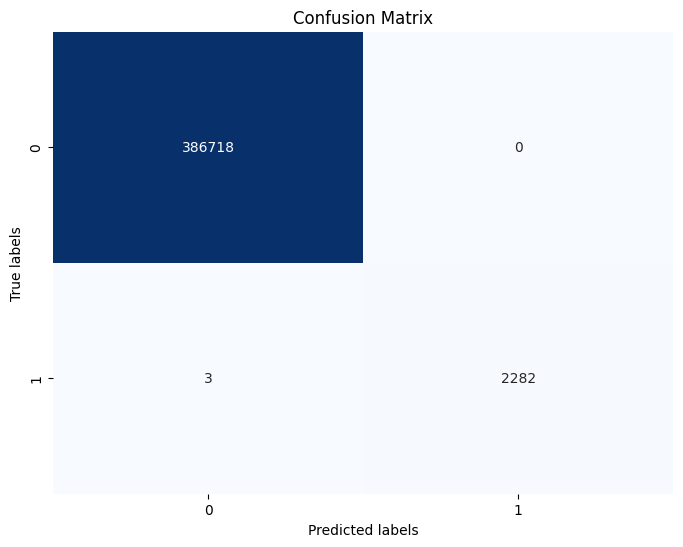

In [120]:
# Plot confusion matrix for RandomForestClassifier
plot_confusion_matrix(rf_model, X_test, y_test)



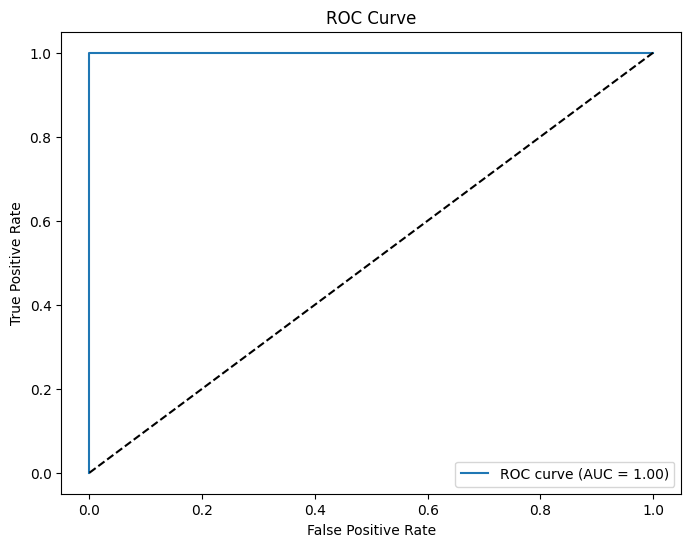

In [121]:
# Plot ROC curve for RandomForestClassifier
plot_roc_curve(rf_model, X_test, y_test)

In [122]:
# Create XGBoostClassifier model
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Evaluate the model
metrics_df_xgb = evaluate_model(xgb_model, X_test, y_test)
print("Evaluation Metrics for XGBoostClassifier:")
metrics_df_xgb



Evaluation Metrics for XGBoostClassifier:


,Metric,Score
0,Accuracy,0.996434
1,Precision,0.992325
2,Recall,0.396061
3,F1-score,0.566156


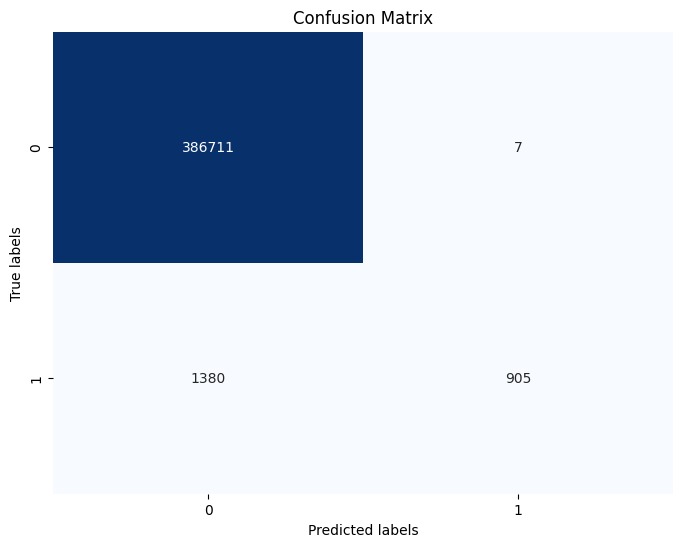

In [123]:
# Plot confusion matrix for XGBoostClassifier
plot_confusion_matrix(xgb_model, X_test, y_test)



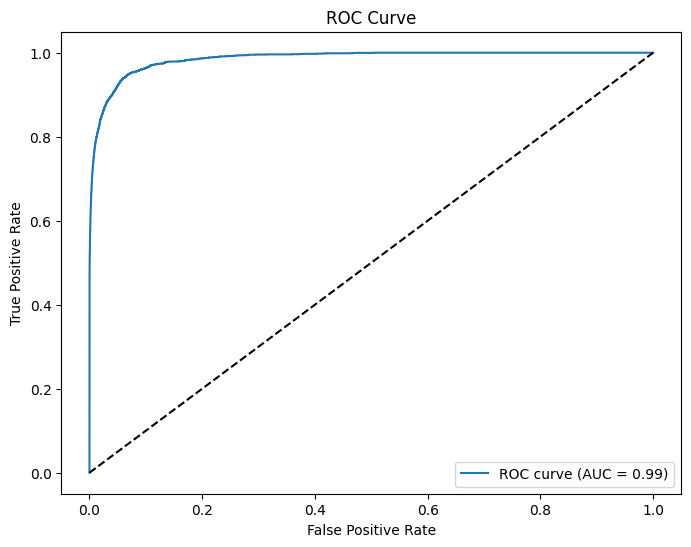

In [124]:
# Plot ROC curve for XGBoostClassifier
plot_roc_curve(xgb_model, X_test, y_test)

In [125]:
# Create LightGBMClassifier model
lgb_model = lgb.LGBMClassifier()

# Train the model
lgb_model.fit(X_train, y_train)

# Evaluate the model
metrics_df_lgb = evaluate_model(lgb_model, X_test, y_test)
print("Evaluation Metrics for LightGBMClassifier:")
metrics_df_lgb

[LightGBM] [Info] Number of positive: 5221, number of negative: 902451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 907672, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005752 -> initscore=-5.152425
[LightGBM] [Info] Start training from score -5.152425
[LightGBM] [Info] Number of positive: 2285, number of negative: 386718
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 389003, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005874 -> initscore=-5.131330
[L

,Metric,Score
0,Accuracy,0.996010
1,Precision,0.860374
2,Recall,0.382932
3,F1-score,0.529982


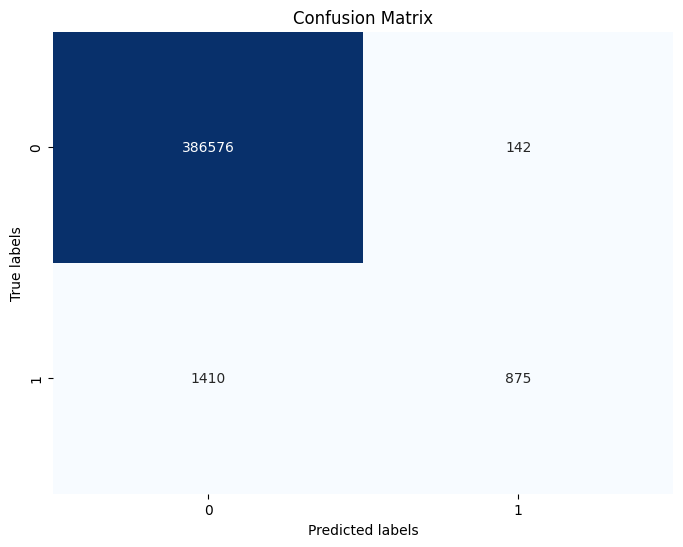

In [126]:
# Plot confusion matrix for LightGBMClassifier
plot_confusion_matrix(lgb_model, X_test, y_test)

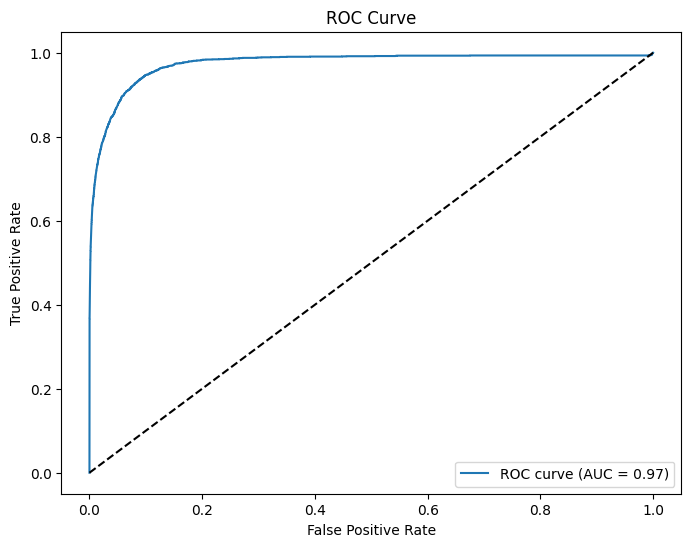

In [127]:
# Plot ROC curve for LightGBMClassifier
plot_roc_curve(lgb_model, X_test, y_test)

# **The Chosen Model is Random Forest Classifier**
-Accuracy	0.999992

-Precision	1.000000

-Recall	0.998687

-F1-score	0.999343
